<a href="https://colab.research.google.com/github/alirezash97/BRATS2015/blob/master/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K

def soft_dice_loss(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
  
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true**2, axis=axis) + K.sum(y_pred**2, axis=axis) + epsilon
    dice_loss = 1 - K.mean((dice_numerator)/(dice_denominator))


    return dice_loss


def dice_coefficient(y_true, y_pred, axis=(1, 2, 3), 
                     epsilon=0.00001):

    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true, axis=axis) + K.sum(y_pred, axis=axis) + epsilon
    dice_coefficient = K.mean((dice_numerator)/(dice_denominator))
    
 
    return dice_coefficient

In [3]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('/content/drive/My Drive/BRATS2020/AcidModel.01-0.86.h5', custom_objects={'soft_dice_loss':soft_dice_loss, 'dice_coefficient':dice_coefficient})
# summarize model.
model.summary()
# load dataset

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 48, 240, 240, 0                                            
__________________________________________________________________________________________________
conv3d_185 (Conv3D)             (None, 48, 240, 240, 328         input_9[0][0]                    
__________________________________________________________________________________________________
conv3d_186 (Conv3D)             (None, 48, 240, 240, 436         conv3d_185[0][0]                 
__________________________________________________________________________________________________
max_pooling3d_33 (MaxPooling3D) (None, 48, 120, 120, 0           conv3d_186[0][0]                 
____________________________________________________________________________________________

In [0]:

import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt


img = nib.load('/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_t1.nii.gz').get_fdata()
y_true = nib.load("/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_seg.nii.gz").get_fdata()

In [0]:
print(img.shape)

(240, 240, 155)


In [0]:
print(y_true.shape)

(240, 240, 155)


In [0]:
y_true = y_true.reshape((1, 240, 240, 155)) 
y_true_ = np.zeros((48, 240, 240, 3))
for i in range (1, 49):
  y_true_[i-1, :, :, :] = y_true[:, :, :, i*3:(i+1)*3]
y_true_ = y_true_.reshape((48, 240, 240, 3))

In [0]:

img = img.reshape((1, 240, 240, 155))
tempp = np.zeros((48, 240, 240, 3))
for i in range (1, 49):
  tempp[i-1, :, :, :] = img[:, :, :, i*3:(i+1)*3]
image = tempp.reshape((1, 48, 240, 240, 3))

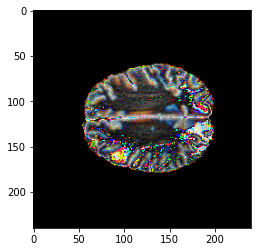

In [9]:
plt.imshow((image[0, 33, :, :, :] * 255).astype(np.uint8))

In [0]:
y_predict = model.predict(image)

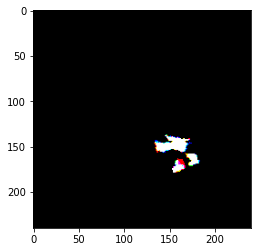

In [17]:
plt.imshow((y_true_[25, :, :, :] * 255).astype(np.uint8))

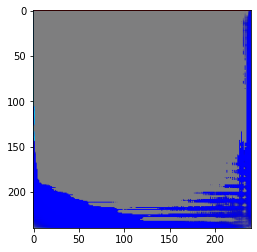

In [16]:
predict = y_predict.reshape((48, 240, 240, 3))
plt.imshow((predict[25, :, :, :] * 255).astype(np.uint8))


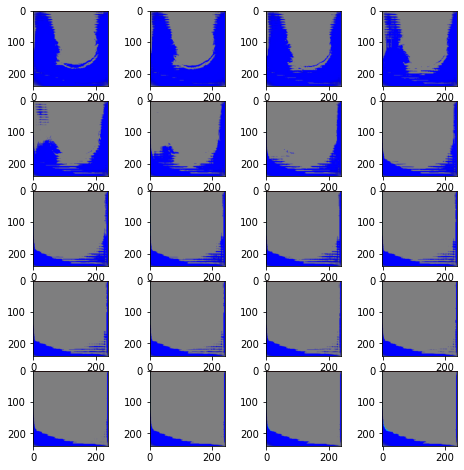

In [18]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = predict[i+15, :, :, :]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

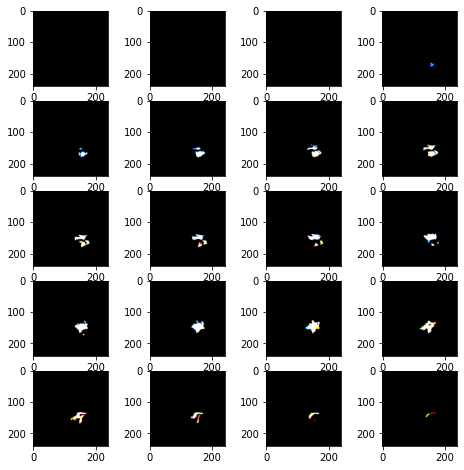

In [19]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = y_true_[i+15, :, :, :]
    fig.add_subplot(rows, columns, i)
    plt.imshow((img * 255).astype(np.uint8))
plt.show()